<a href="https://colab.research.google.com/github/BrandoSor4/Data-Mining/blob/main/Soriano_Brando_A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assignment provides an opportunity to build an ANN model using the a bank marketing dataset

https://www.kaggle.com/sriharipramod/bank-loan-classification

Target variable - personal loan - reflects whether a customer accepted a personal loan offer.

Load the data and perform EDA.

1. Evaluate missing values.
2. Assess target class distribution.
3. Pre-process data as needed.
4. Assess information value of individual features (correlation analysis and pairlot).

5 pts.

In [ ]:
#In this analysis, using bank loan classification and exploring the possibility of predicting customer behavior regarding personal loan acceptance.
#Our goal is to identify correlations between various customer attributes such as family, income, education, and age as their decision to accept a personal loan.


In [ ]:
import pandas as pd
import zipfile
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df= pd.read_csv('Loan.zip',compression='zip')

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.isnull().sum()
#No null values

In [ ]:
df.shape
#5000 rows by 14 and columns

In [ ]:
df.info

In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df.dtypes

In [ ]:
df['Personal Loan'].value_counts()
#

0    4520
1     480
Name: Personal Loan, dtype: int64

<Axes: >

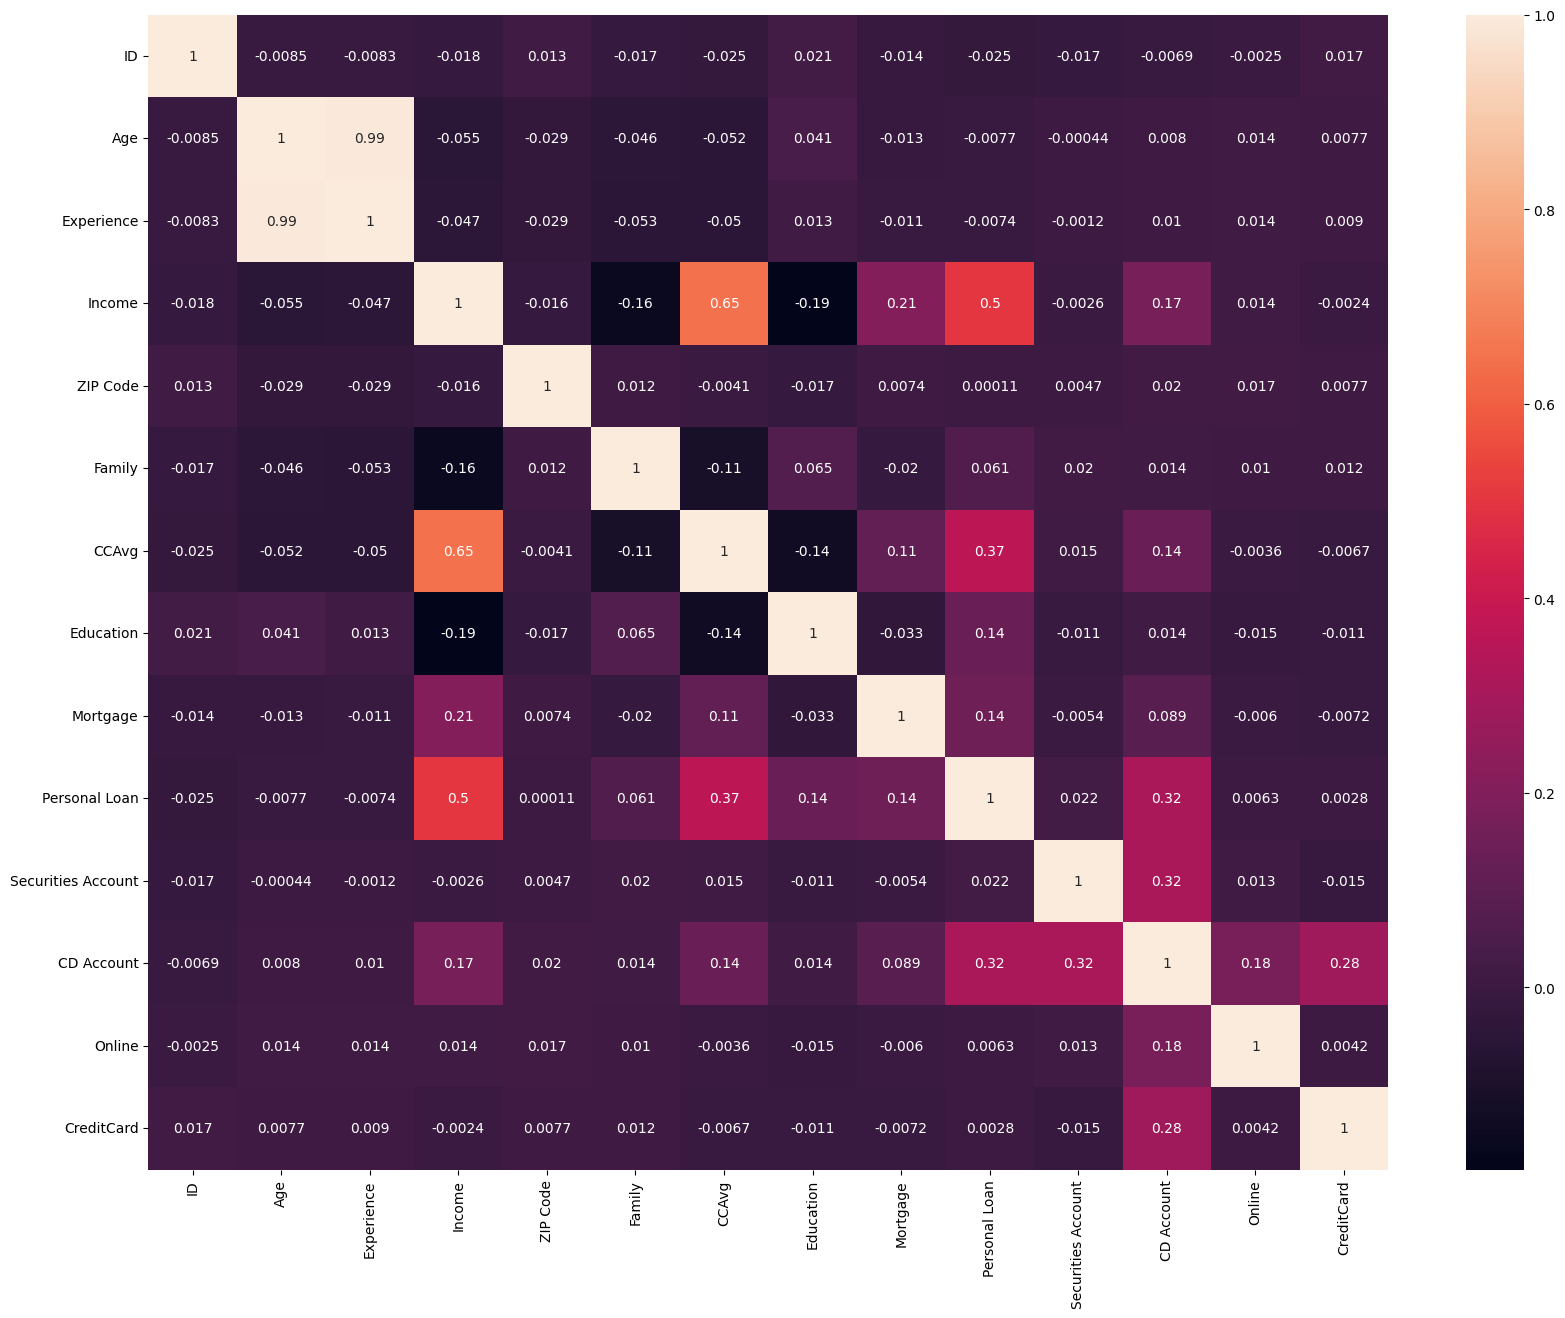

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Personal Loan', axis=1))
y = df['Personal Loan']


5. Split the data 70/30 into training and test datasets.
6. Develop an ANN model (MLPClassifier) with a single hidden layer with 20 nodes.
7. Assess model performance, provide the confusion matrix, classification report and ROC AUC values.

10 pts.

In [ ]:
#split the data into training and test datasets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
#Build ANN Model

In [ ]:
ann_model = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', solver='adam', max_iter=1000, random_state=1)
ann_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=1)

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.corr()['Personal Loan'].sort_values(ascending=False)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

In [ ]:
ann_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,), max_iter=1000,
              random_state=1)

In [ ]:
y_pred = ann_model.predict(X_test)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1338   13]
 [ 104   45]]


In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1351
           1       0.78      0.30      0.43       149

    accuracy                           0.92      1500
   macro avg       0.85      0.65      0.70      1500
weighted avg       0.91      0.92      0.91      1500



In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.6461954604841555


8. Assess the effect of the number of hidden nodes (5-30) on model accuracy.
9. Identify optimal number of nodes.

5 pts.

In [ ]:
 hidden_nodes = [5, 10, 15, 20, 25, 30]
for nodes in hidden_nodes:
    ann_model = MLPClassifier(hidden_layer_sizes=(nodes,), random_state=42)
    ann_model.fit(X_train, y_train)
    y_pred = ann_model.predict(X_test)
    print(f"Nodes: {nodes}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nodes: 5


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nodes: 10


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nodes: 15


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nodes: 20


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Nodes: 25
Nodes: 30


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
optimal_ann_model = MLPClassifier(hidden_layer_sizes=(20,), random_state=42)
optimal_ann_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20,), random_state=42)

In [ ]:
y_opt_pred = optimal_ann_model.predict(X_test)
opt_conf_matrix = confusion_matrix(y_test, y_opt_pred)
opt_class_report = classification_report(y_test, y_opt_pred)
opt_roc_auc = roc_auc_score(y_test, y_opt_pred)

In [ ]:
print("Optimal Model Evaluation")
print(opt_conf_matrix)
print(opt_class_report)
print(f"Optimal ROC AUC Score: {opt_roc_auc}")

Optimal Model Evaluation
[[1342    9]
 [ 101   48]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1351
           1       0.84      0.32      0.47       149

    accuracy                           0.93      1500
   macro avg       0.89      0.66      0.71      1500
weighted avg       0.92      0.93      0.91      1500

Optimal ROC AUC Score: 0.6577429594781892


## Our current model's ROC AUC score is approximately 0.66, which falls short of our threshold for reliable predictions.